# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.


## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


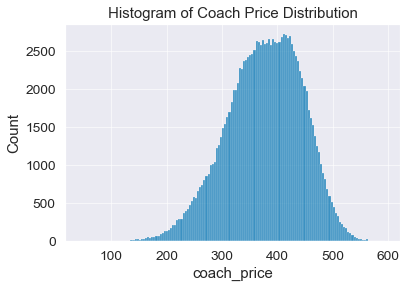

<Figure size 432x288 with 0 Axes>

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mtick

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

sns.histplot(flight.coach_price)
plt.title('Histogram of Coach Price Distribution')

plt.show()
plt.clf()



2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

The maximum coach price is: 593.635
The minimum coach price is: 170.77
The average coach price is: 431.83
The median coach price is: 437.12


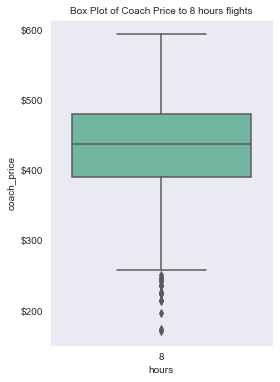

<Figure size 432x288 with 0 Axes>

In [27]:
coach_price_8h = flight.coach_price[flight.hours == 8]
flight_coachprice_8h = flight[flight.hours == 8]

print('The maximum coach price is:', coach_price_8h.max())
print('The minimum coach price is:', coach_price_8h.min())
print('The average coach price is:', round(coach_price_8h.mean(), 2))
print('The median coach price is:', round(coach_price_8h.median(), 2))

fig, ax = plt.subplots(figsize=(4, 6))
sns.boxplot(data=flight_coachprice_8h, x='hours', y='coach_price')
sns.set_palette('Set2')
sns.set_style('dark')

plt.title('Box Plot of Coach Price to 8 hours flights', fontsize=10)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()
plt.clf()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


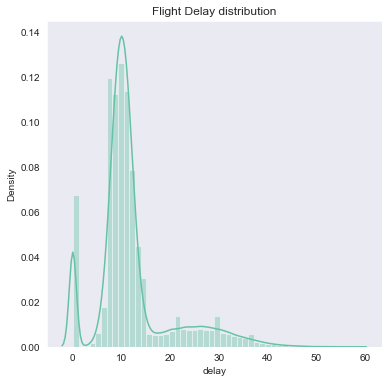

<Figure size 432x288 with 0 Axes>

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.distplot(flight.delay[flight.delay <= 500])
plt.title('Flight Delay distribution')
plt.show()
plt.clf()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

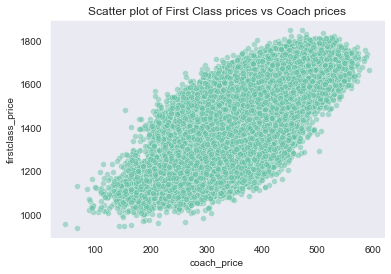

<Figure size 432x288 with 0 Axes>

In [59]:
sns.scatterplot(x=flight.coach_price, y=flight.firstclass_price, alpha=0.5, palette='bright')
plt.title('Scatter plot of First Class prices vs Coach prices')

plt.show()
plt.clf()


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

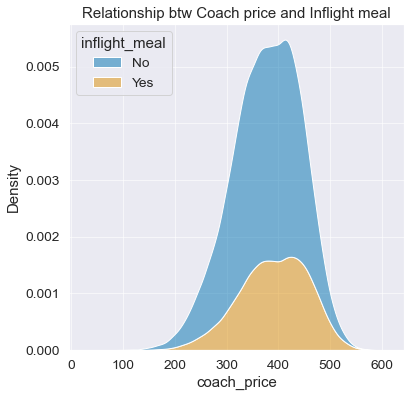

<Figure size 432x288 with 0 Axes>

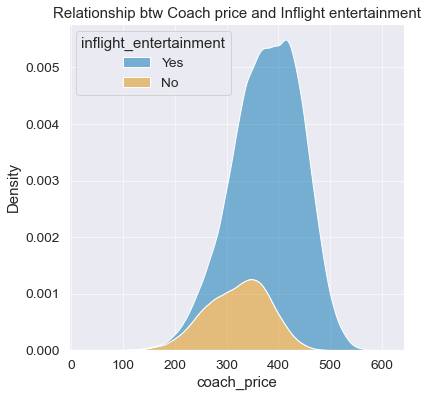

<Figure size 432x288 with 0 Axes>

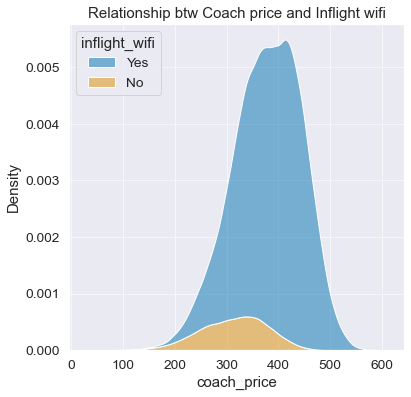

<Figure size 432x288 with 0 Axes>

In [112]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=flight, x='coach_price', hue='inflight_meal', multiple="stack", alpha=0.5)
sns.set_palette('colorblind')
plt.title('Relationship btw Coach price and Inflight meal')
sns.move_legend(ax, loc='upper left')
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=flight, x='coach_price', hue='inflight_entertainment', multiple="stack", alpha=0.5)
sns.set_palette('colorblind')
plt.title('Relationship btw Coach price and Inflight entertainment')
sns.move_legend(ax, loc='upper left')
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=flight, x='coach_price', hue='inflight_wifi', multiple="stack", alpha=0.5)
sns.set_palette('colorblind')
plt.title('Relationship btw Coach price and Inflight wifi')
sns.move_legend(ax, loc='upper left')
plt.show()
plt.clf()



6. How does the number of passengers change in relation to the length of flights?

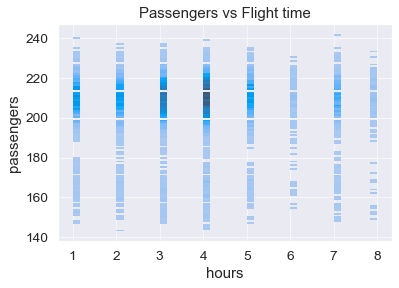

<Figure size 432x288 with 0 Axes>

In [96]:
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

sns.histplot(x = "hours", y = "passengers", data = flight_sub)
plt.title('Passengers vs Flight time')
plt.show()
plt.clf()



## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

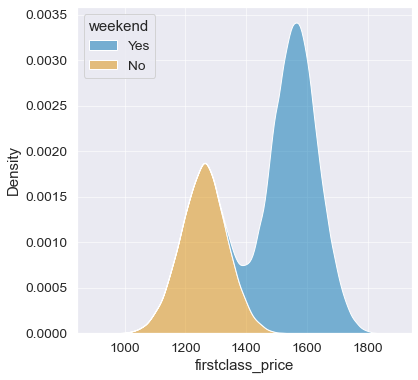

<Figure size 432x288 with 0 Axes>

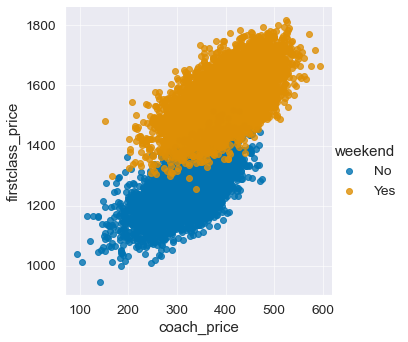

<Figure size 432x288 with 0 Axes>

In [114]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(data=flight, x='firstclass_price', hue='weekend', multiple="stack", alpha=0.5)
sns.set_palette('colorblind')
sns.move_legend(ax, loc='upper left')
plt.show()
plt.clf()

sns.lmplot(x = 'coach_price', y = 'firstclass_price', hue = 'weekend', data = flight_sub, fit_reg=False)
plt.show()
plt.clf()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

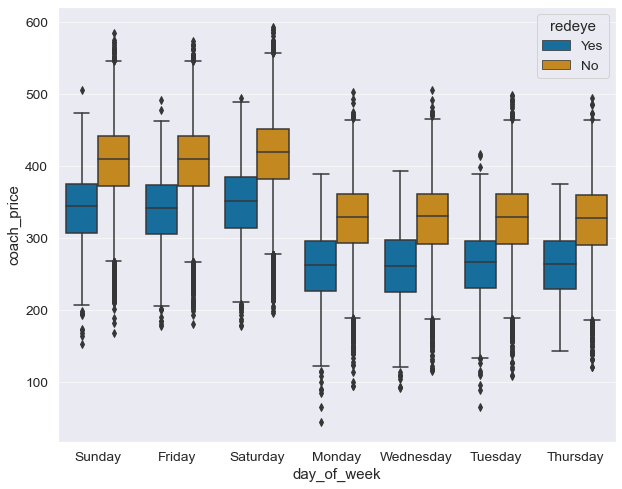

<Figure size 432x288 with 0 Axes>

In [119]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.show()
plt.clf()




